Exercise Sheet 3
**Kernel Principal Component Analysis**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
plt.rc('figure', figsize=(20.0, 12.0))

**Exercise 3.1: Create Toy Data**

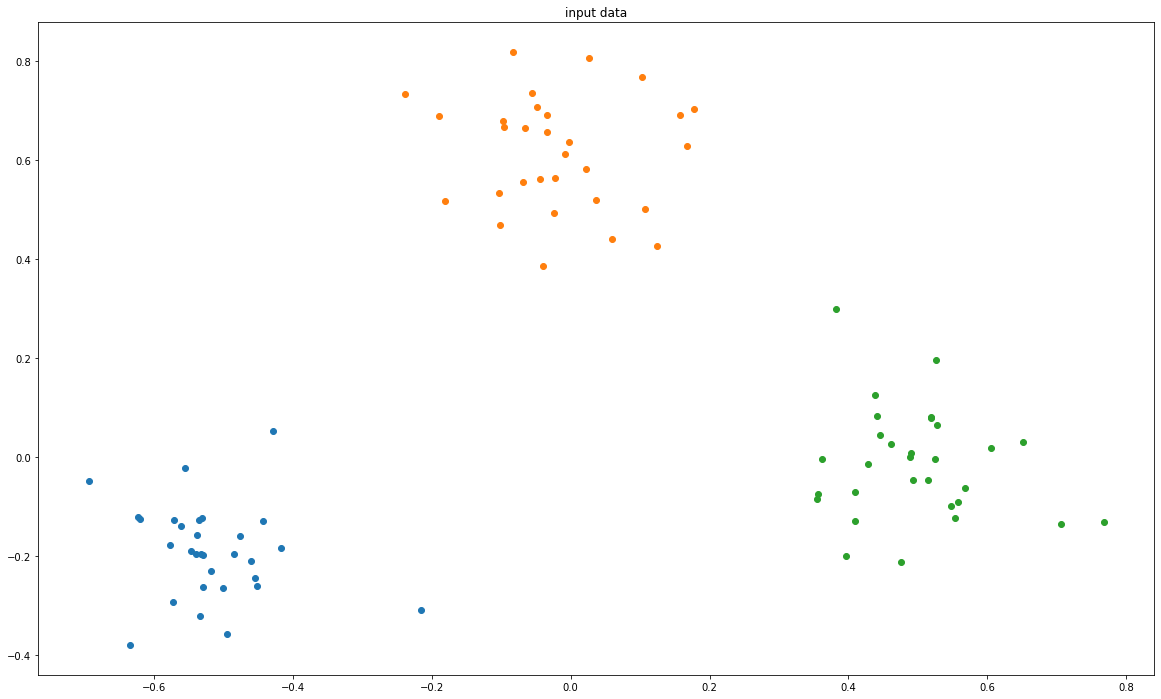

In [2]:
#make dataset
def mk_ds(mean,SD=0.1,ds_shape=(30,2)):
    return np.random.normal(mean,SD,ds_shape)

dataset = np.concatenate((mk_ds((-0.5,-0.2)),mk_ds((0,0.6)),mk_ds((0.5,0))))
plt.scatter(*(dataset[:30].T))
plt.scatter(*(dataset[30:60].T))
plt.scatter(*(dataset[60:].T))
plt.title("input data")
plt.show()

**Exercise 3.2: Apply Kernel PCA using RBF Kernel**

In [3]:
def kernel_fct(x1,x2,sig=0.1):
    return np.exp(-np.linalg.norm(x1-x2)**2/(2*sig**2))

def make_K(dataset):
    K = np.zeros((dataset.shape[0],dataset.shape[0]))
    for i,data1 in enumerate(dataset):
        for j,data2 in enumerate(dataset):
            K[i,j] = kernel_fct(data1,data2)
    return K
    
def center_K(K):
    size_K = K.shape[0]
    row_avg = np.repeat([np.mean(K,axis=0)],size_K,axis=0).T
    col_avg = np.repeat([np.mean(K,axis=1)],size_K,axis=0)
    mat_avg = np.mean(K)
    return K - row_avg - col_avg + mat_avg


K = make_K(dataset)
K_centered = center_K(K)

lambdas, A = np.linalg.eig(K_centered)



A, the matrix of eigenvectors of K, holds the coefficients a.

**Exercise 3.3: Visualize first 8 PCs**

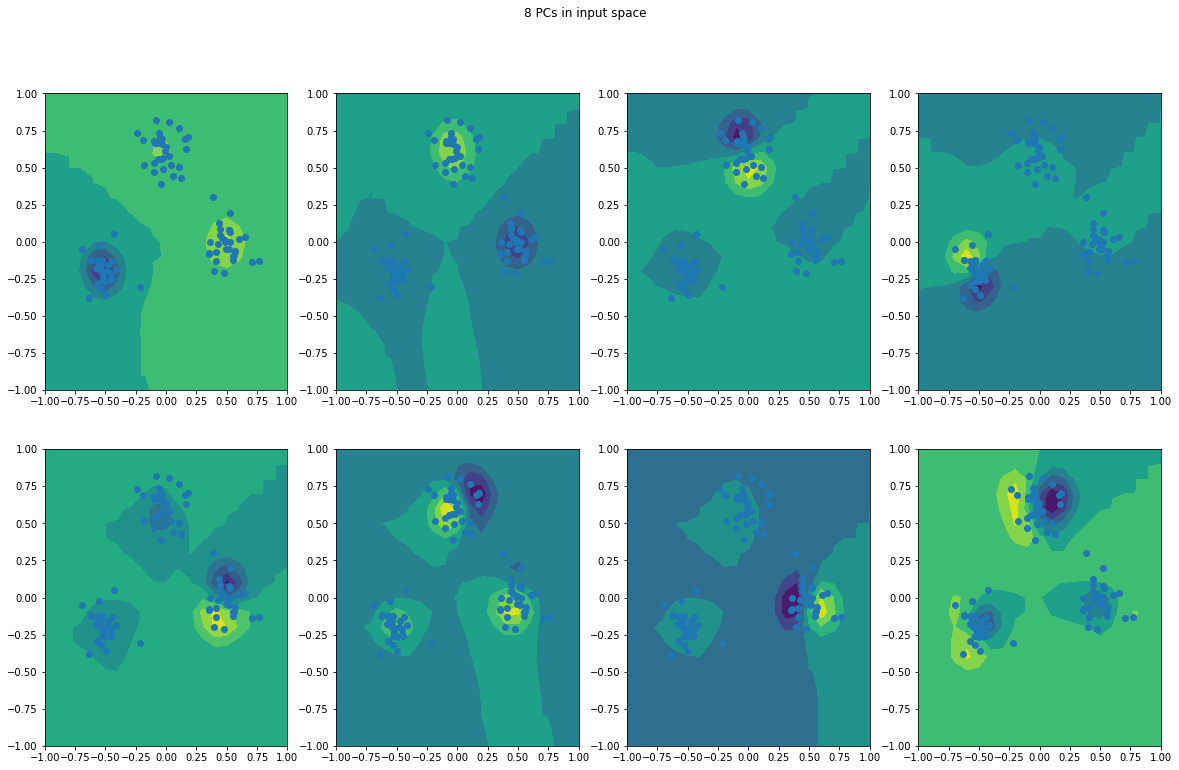

In [4]:
#get first 8 PCs and corresponding eigenvalues
PC8 = A[:,:8]
lambda8 = lambdas[:8]

#normalize
p = 90
normalizing_factor = 1/(np.sqrt(lambda8*p))
PC8_normalized = PC8*lambda8

xrange = np.arange(-1,1.1,0.1)
yrange = np.arange(-1,1.1,0.1)

xx,yy = np.array(np.meshgrid(xrange, yrange, sparse=False))

def project_to_feature_space(pc,x,K,dataset):
    w, V = np.linalg.eig(K)
    res = 0
    for i,data in enumerate(dataset):
        res += pc[i]*kernel_fct(x,data)
    return res

fig,ax = plt.subplots(2,4)

for k,pc in enumerate(PC8_normalized.T):
    pc1grid = np.zeros((xrange.shape[0],yrange.shape[0]))
    for i,x in enumerate(xrange):
        for j,y in enumerate(yrange):
            pc1grid[j][i] = project_to_feature_space(pc,[x,y],K_centered,dataset)


    ax[k//4,k%4].contourf(xx,yy,pc1grid)
    ax[k//4,k%4].scatter(*dataset.T)
plt.suptitle("8 PCs in input space")
plt.show()

Apparently, the first two components explain the structure of the data best. They distinguish between clusters. The rest explain variance within the clusters.

d) Kernel-PCA should be used in cases where the data is structured in a non-linear fashion.